In [71]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import math

Plot a histogram of the processed amounts of each transaction, the transactionAmount column.

Report any structure you find and any hypotheses you have about that structure.

In [3]:
def Display_all_columns_nrow(df, n): #Example 8 = Top 4 & Bottom 4 Rows with all column view on scroll
    with pd.option_context("display.max_rows", n, "display.max_columns", df.shape[1]): 
        display(df)

In [119]:
df = pd.read_hdf('data/df_transactions_continue.h5')
# df['currentExpDate'] = df['currentExpDate'].dt.strftime('%Y-%M')
Display_all_columns_nrow(df, 6)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,rideshare,2023-06-01,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000,5000.00,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,2024-02-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786360,732852505,732852505,50000,48766.15,2016-12-27 15:46:24,49.43,Lyft,US,US,02,01,rideshare,2025-08-01,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29 00:30:55,49.89,walmart.com,US,US,09,99,online_retail,2022-07-01,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False
786362,732852505,732852505,50000,48666.83,2016-12-30 20:10:29,72.18,Uber,US,US,05,01,rideshare,2024-05-01,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1333.17,False,False,False


In [5]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [5]:
categorical_columns = df.select_dtypes(include=['object', 'category','bool']).columns.tolist()

cat_summary = [f"'{col}': {df[col].nunique()} unique values" for col in categorical_columns]
cat_summary.insert(0, f"Total Categorical Columns = {len(categorical_columns)}\n")
cat_summary

table = pd.DataFrame({
    
    'Number of Unique Values': df[categorical_columns].apply(lambda col: col.nunique())
})

table

,Number of Unique Values
merchantName,2490
acqCountry,4
merchantCountryCode,4
posEntryMode,5
posConditionCode,6
merchantCategoryCode,19
transactionType,3
cardPresent,2
expirationDateKeyInMatch,2
isFraud,2


# Histogram Plotting Function with KDE Overlay

In [96]:
def plot_Histogram(column_name, df, bins=15, add_kde=False, size = (6,3)):
    plt.figure(figsize=size)
    plt.hist(df[column_name], bins=bins, alpha=0.7, color='blue', density=True)
    plt.title(f'Histogram of {column_name}')
    plt.grid(True)
    plt.xlabel(column_name)
    plt.ylabel('Density')
    if add_kde:
        plt.title(f'Histogram of {column_name} with kde')
        sns.kdeplot(df[column_name], color='blue', linewidth=2)
    plt.show()

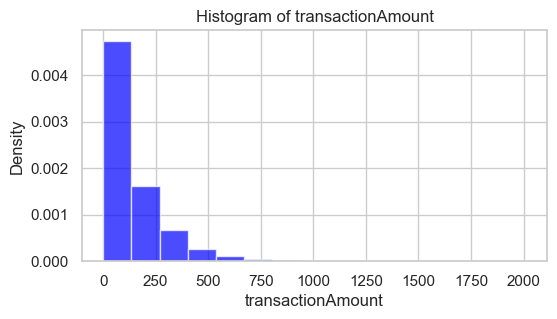

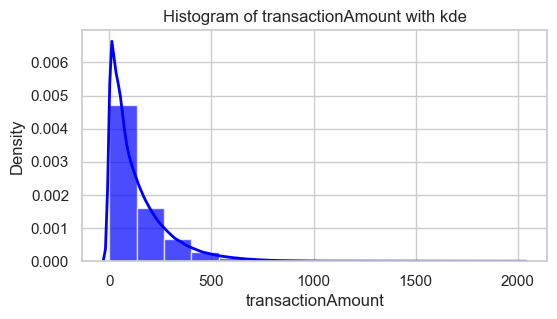

In [97]:
plot_Histogram('transactionAmount', df, bins = 15)
plot_Histogram('transactionAmount', df, bins = 15, add_kde=True)

In [98]:
round(len(df[(df.transactionAmount < 130)])/len(df),2)

0.62

# Comprehensive Visualizations for Transaction Data Exploration

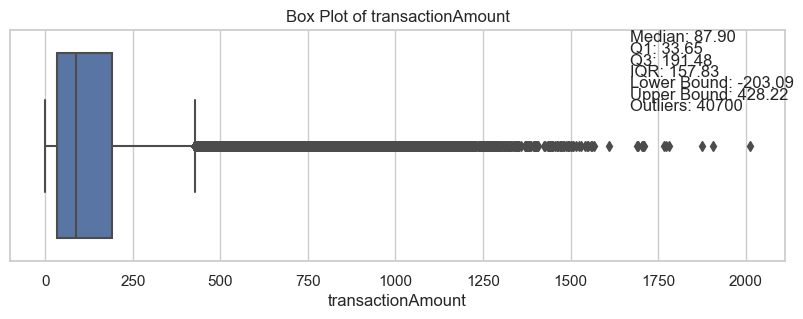

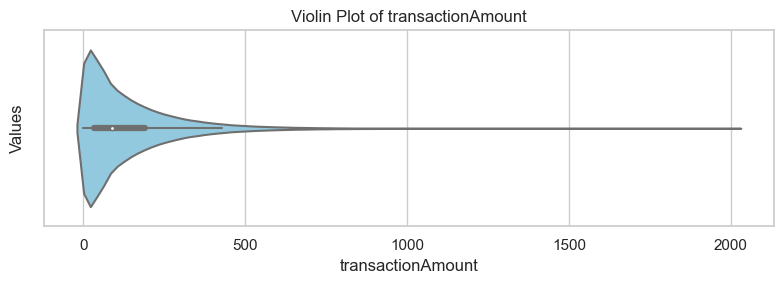

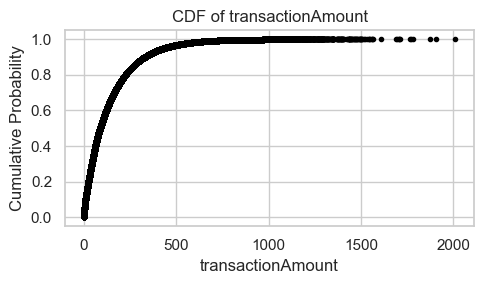

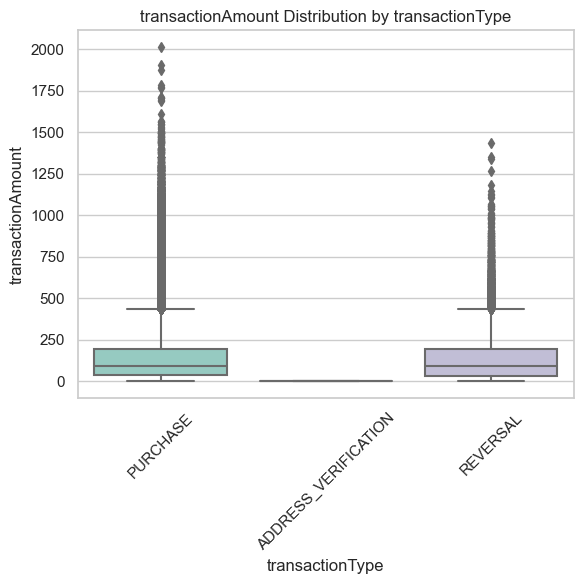

<Figure size 1000x800 with 0 Axes>

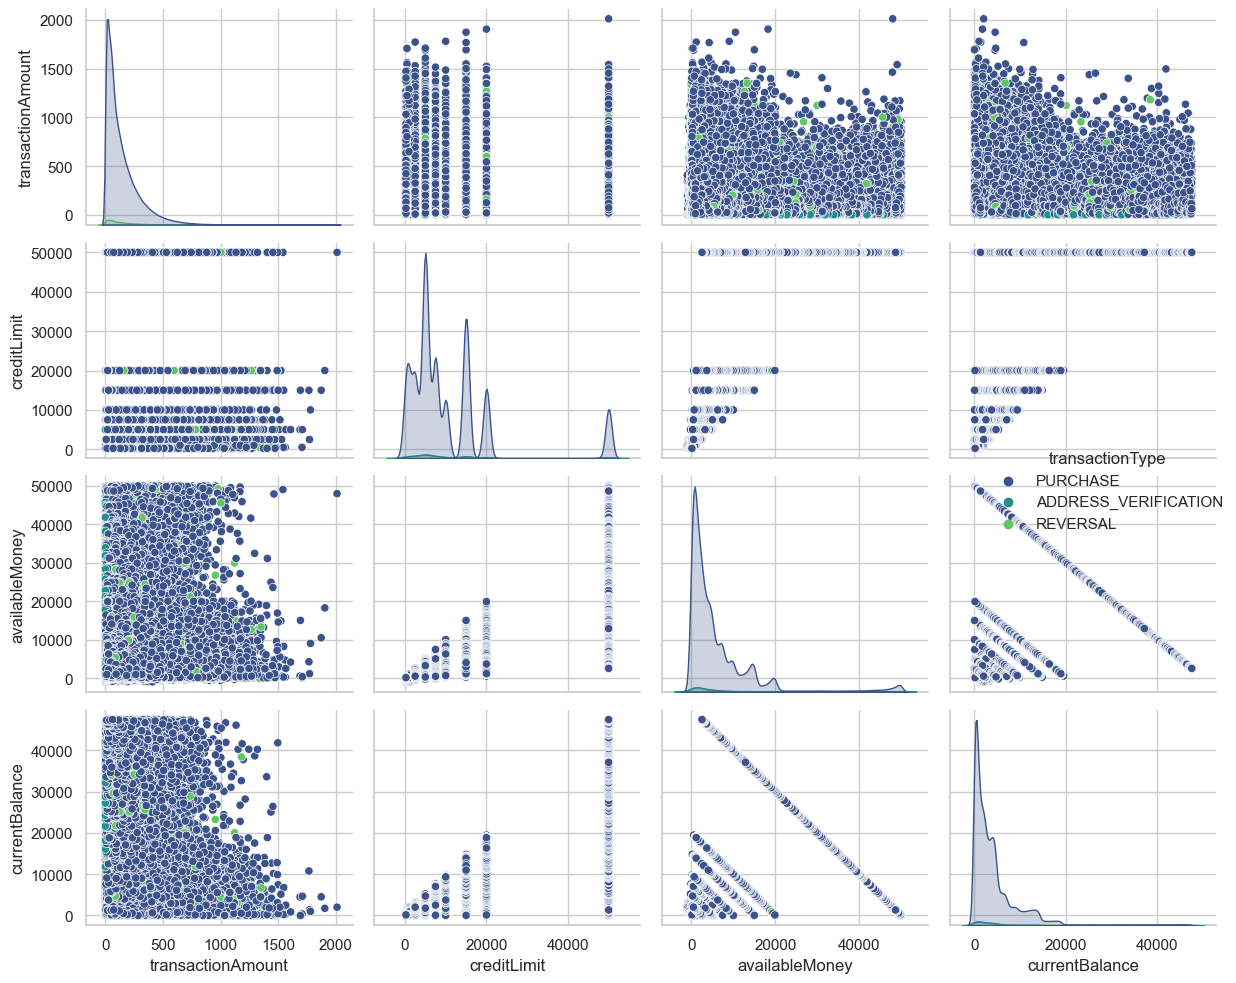

In [60]:
sns.set(style='whitegrid')
import warnings


def plot_BoxPlot(column_name, df):
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=df[column_name])
    plt.title(f'Box Plot of {column_name}')
    plt.xlabel(column_name)
    
    # Calculate key statistics
    q1 = np.percentile(df[column_name], 25)
    q3 = np.percentile(df[column_name], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    
    plt.text(0.80, 0.95, f'Median: {df[column_name].median():.2f}', transform=plt.gca().transAxes)
    plt.text(0.80, 0.90, f'Q1: {q1:.2f}', transform=plt.gca().transAxes)
    plt.text(0.80, 0.85, f'Q3: {q3:.2f}', transform=plt.gca().transAxes)
    plt.text(0.80, 0.80, f'IQR: {iqr:.2f}', transform=plt.gca().transAxes)
    plt.text(0.80, 0.75, f'Lower Bound: {lower_bound:.2f}', transform=plt.gca().transAxes)
    plt.text(0.80, 0.70, f'Upper Bound: {upper_bound:.2f}', transform=plt.gca().transAxes)
    plt.text(0.80, 0.65, f'Outliers: {len(outliers)}', transform=plt.gca().transAxes)
    plt.show()

def plot_ViolinPlot(column_name, df):
    plt.figure(figsize=(8, 3))
    sns.violinplot(x=df[column_name], color='skyblue')
    plt.title(f'Violin Plot of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Values')
    plt.tight_layout()
    plt.show()

def plot_CDF(column_name, df):
    plt.figure(figsize=(5,3))
    sorted_data = np.sort(df[column_name])
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf, marker='.', linestyle='none', color='black')
    plt.title(f'CDF of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Cumulative Probability')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_TransactionTypeDistribution(column_name, category_column, df):
    plt.figure(figsize=(6,6))
    sns.boxplot(x=category_column, y=column_name, data=df, palette='Set3')
    plt.title(f'{column_name} Distribution by {category_column}')
    plt.xlabel(category_column)
    plt.ylabel(column_name)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_PairwiseRelationships(df):
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
    plt.figure(figsize=(10, 8))
    sns.pairplot(df[['transactionAmount', 'creditLimit', 'availableMoney', 'currentBalance','transactionType']],
                 diag_kind='kde', hue = 'transactionType', palette='viridis')
    plt.tight_layout()
    plt.show()

plot_BoxPlot('transactionAmount', df)
plot_ViolinPlot('transactionAmount', df)
plot_CDF('transactionAmount', df)
plot_TransactionTypeDistribution('transactionAmount', 'transactionType', df)
plot_PairwiseRelationships(df)

- Transaction Amount Distribution: The box plot and violin plot highlight the distribution of transaction amounts. Outliers are present in the data, indicating potential anomalies or significant transactions.
Transaction Amount Variation by Type:

- Box plot grouped by transaction type suggests varying transaction amount distributions across different types. Some transaction types might have higher or lower median transaction amounts.

- The CDF(Cumulative Distribution Function) graph shows the accumulation of transaction amounts, providing a sense of data spread. It indicates that a significant portion of transactions falls below certain amounts.

- Pairwise Relationships with KDE: The pair plot offers insights into relationships among transaction amount, credit limit, available money, and current balance. KDE plots on the diagonal showcase the density of each variable. Scatter plots showcase the relationships between variables, potentially indicating patterns, correlations, or differences based on transaction types. 
The distribution of the 'transactionAmount' appears to be right-skewed, with a concentration of smaller values and a long tail of larger values. 'currentBalance', and 'availableMoney' also seems to be mostly right skwed. 'currentBalance' and 'availableMoney' seems to be inversely related based on scatter plot.

# Visualizing Total Transaction Amount and Rolling Averages Over Time

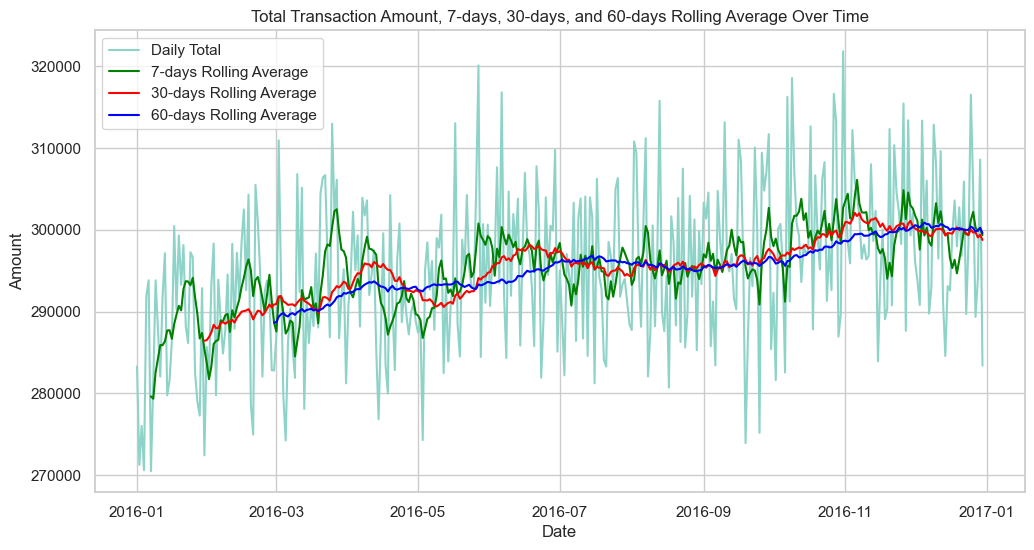

In [126]:
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df.set_index('transactionDateTime', inplace=True)

# Resample by day and sum transactionAmount
daily_total_amount = df['transactionAmount'].resample('D').sum()

# Calculate the rolling average with a window
rolling_avg_7 = daily_total_amount.rolling(window=7).mean()
rolling_avg_30 = daily_total_amount.rolling(window=30).mean()
rolling_avg_60 = daily_total_amount.rolling(window=60).mean()

# Plot the total transaction amount and rolling average over time
plt.figure(figsize=(12, 6))
plt.plot(daily_total_amount.index, daily_total_amount.values, label='Daily Total')
plt.plot(rolling_avg_7.index, rolling_avg_7.values, label='7-days Rolling Average', color='green')
plt.plot(rolling_avg_30.index, rolling_avg_30.values, label='30-days Rolling Average', color='red')
plt.plot(rolling_avg_60.index, rolling_avg_60.values, label='60-days Rolling Average', color='blue')
plt.title('Total Transaction Amount, 7-days, 30-days, and 60-days Rolling Average Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

- The above visualization chart helps in understanding the overall transaction activity, identifying trends, and observing patterns in a more smoothed manner, which can aid in making informed decisions or predictions related to transaction behavior.

- Smoothed Patterns with Rolling Averages: The inclusion of rolling averages (7-days, 30-days, and 60-days) helps smooth out the noise in the daily transaction data, making underlying trends more visible. If the rolling averages are consistently rising, it could suggest a gradual increase in transaction amounts over time. Conversely, declining rolling averages might indicate a decrease in transaction activity.

- Identifying Short-term vs. Long-term Trends: By comparing the different rolling averages, you can distinguish between short-term and long-term trends. The 7-day rolling average reacts more quickly to recent changes, while the 60-day rolling average provides a longer-term perspective. If the short-term and long-term averages align in their directions, it signifies a sustained trend. Divergence between the averages might indicate temporary fluctuations or shifts in behavior.

C:\Users\asus\AppData\Local\Temp\ipykernel_12940\3995331897.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Reds)


<Axes: >

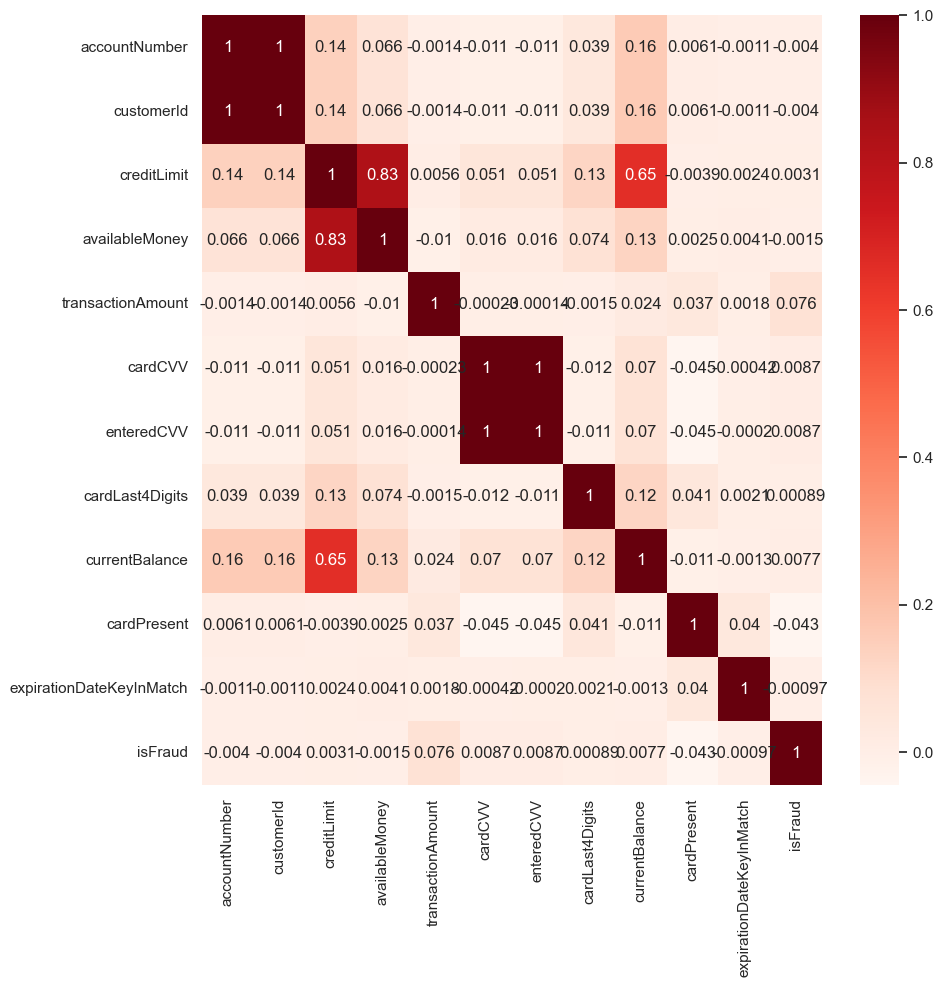

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Reds)

** Note: Above I've created a heatmap to visually represent correlations within your dataframe. Currently, the heatmap displays correlations for both numerical and categorical columns combined. As a result, it might not clearly indicate positive or negative correlations with the "isFraud" variable. However, this will change once I proceed to encode the categorical columns into numerical data. This encoding will enhance the heatmap's ability to demonstrate correlation patterns, allowing me to more accurately interpret the relationships between columns and the "isFraud" variable.

But still I can identify good correlation between accountNumber and customerID, cardCVV and enteredCVV, creditLimit and availableMoney.

# Visualizing Value Counts and Correlations of Categorical Columns in the Dataset

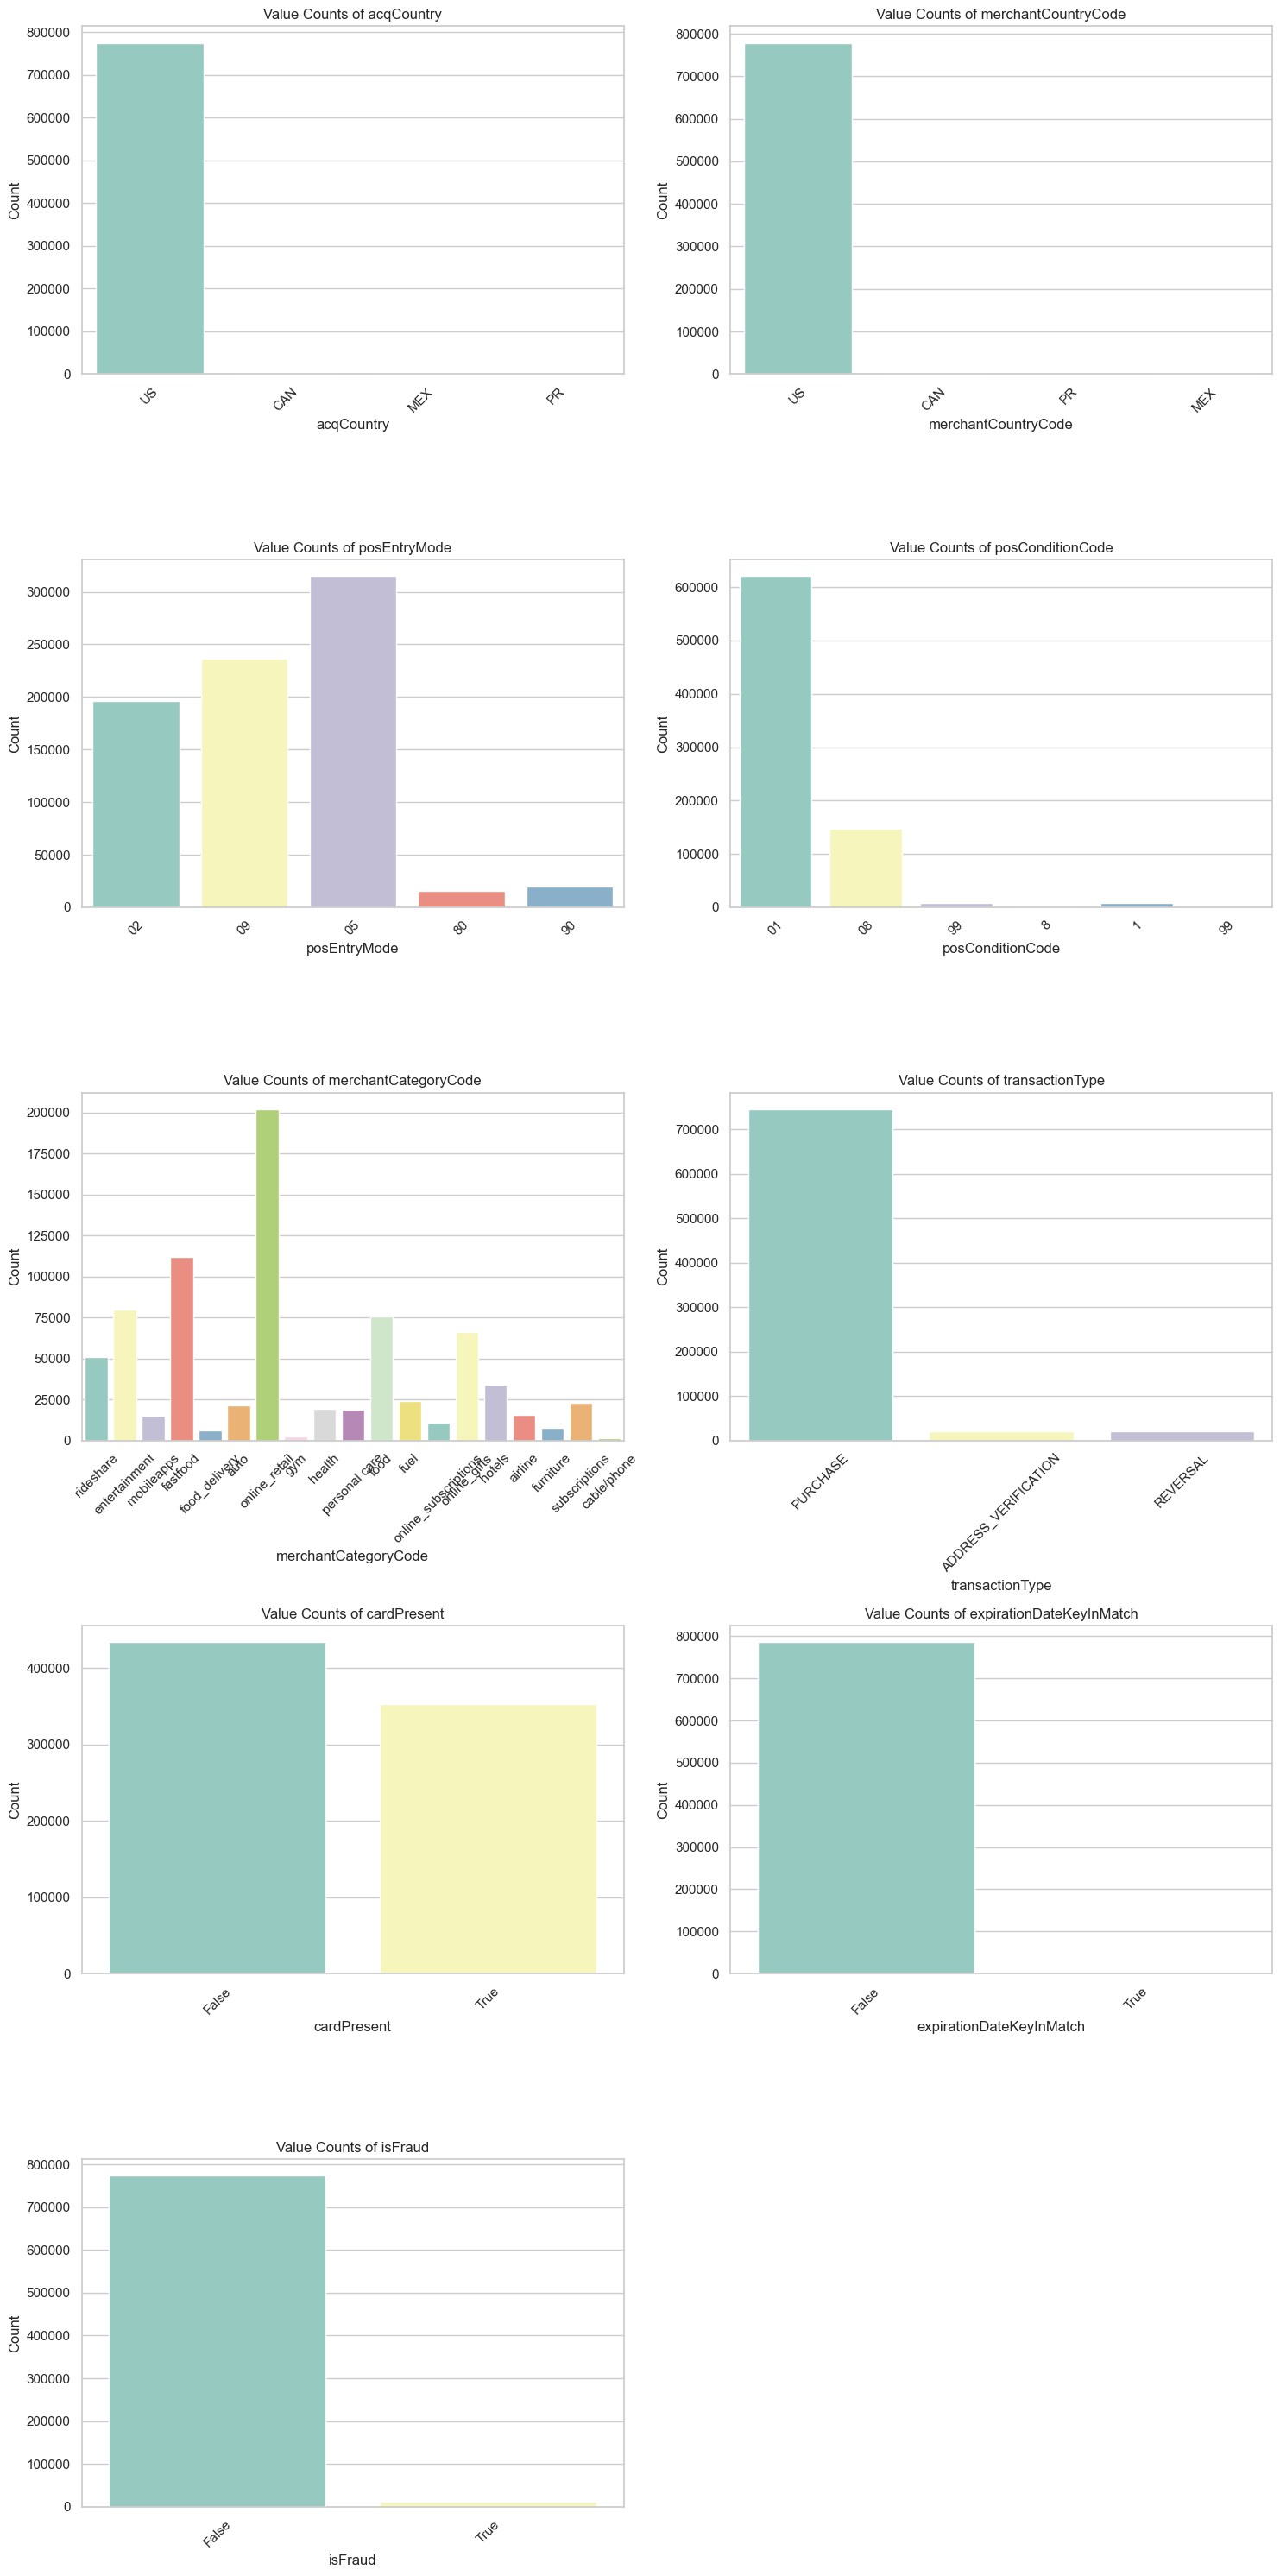

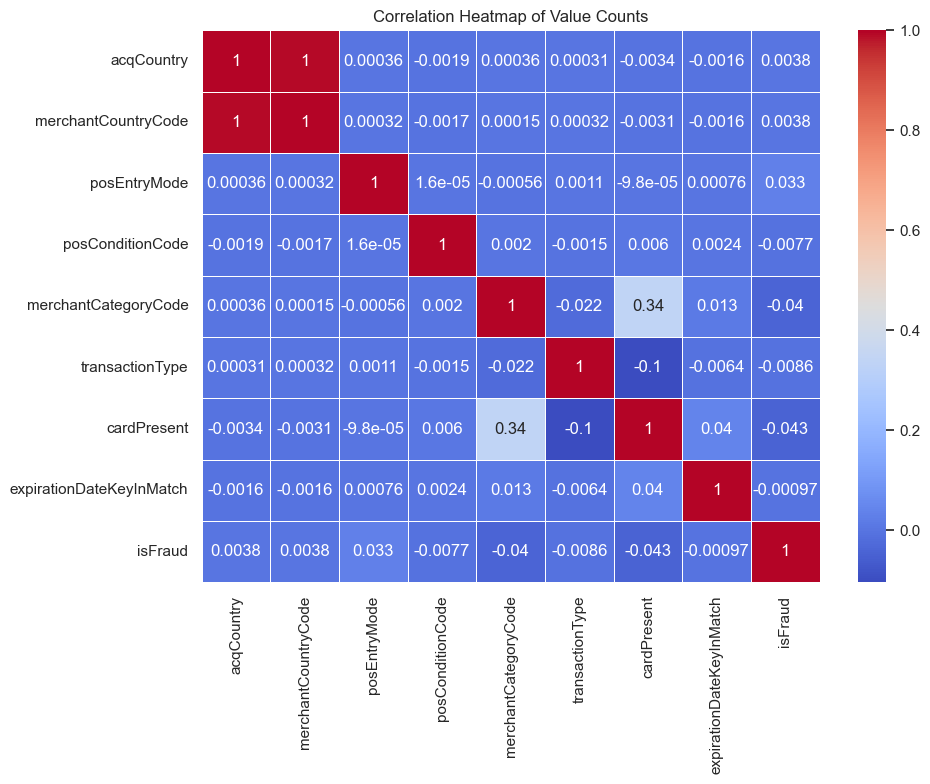

In [65]:
def plot_value_counts_grid(df, column_names):
    num_columns = len(column_names)
    num_rows = (num_columns + 1) // 2  # Round up to the nearest integer
    plt.figure(figsize=(15, 30))
    
    for i, column in enumerate(column_names, start=1):
        plt.subplot(num_rows, 2, i)
        sns.countplot(data=df, x=column, palette='Set3')
        plt.title(f'Value Counts of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Analyze value counts for each categorical column
selectedcategorical_columns = ['acqCountry', 'merchantCountryCode', 'posEntryMode',
                       'posConditionCode', 'merchantCategoryCode', 'transactionType',
                       'cardPresent', 'expirationDateKeyInMatch', 'isFraud']

plot_value_counts_grid(df, categorical_columns)

# Categorical column Correlation heatmap for value counts between columns
correlation_matrix = df[categorical_columns].apply(lambda x: x.map(dict(x.value_counts()))).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Value Counts')
plt.tight_layout()
plt.show()


1. Value Counts Visualization:
The plot_value_counts_grid function takes a DataFrame and a list of categorical column names as input and creates a grid of count plots. Each plot displays the distribution of unique values within a categorical column. This visualization helps to understand the frequency distribution of different categories within each selected column.

2. Categorical Column Correlation Heatmap:
Following the value counts visualization, the code computes the correlation matrix among the selected categorical columns. It calculates correlations based on the value counts of categories within each column. This heatmap provides insight into the relationships and similarities between the categorical columns in terms of their value count distributions. Warmer colors indicate stronger positive correlations, while cooler colors indicate weaker or negative correlations. This visualization helps identify potential patterns and dependencies between categorical variables. ('acqCountry' and 'merchantCountryCode' are highly positively correlated)

** Note: After Numerical encoding of this categorical features we will able to see more relation among the other features.

# Analyzing Relationships between Categorical Columns through Count Plot Visualizations

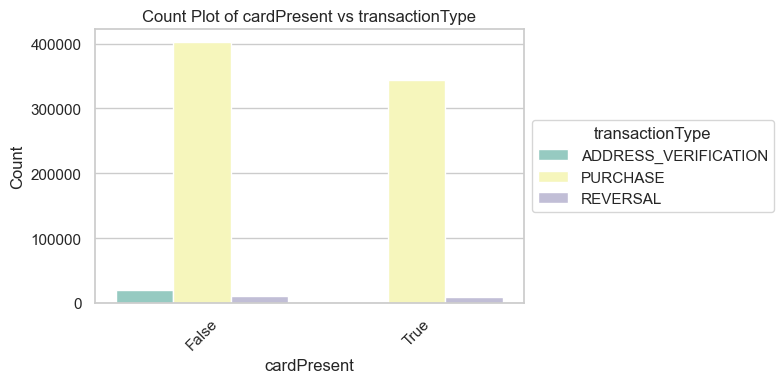

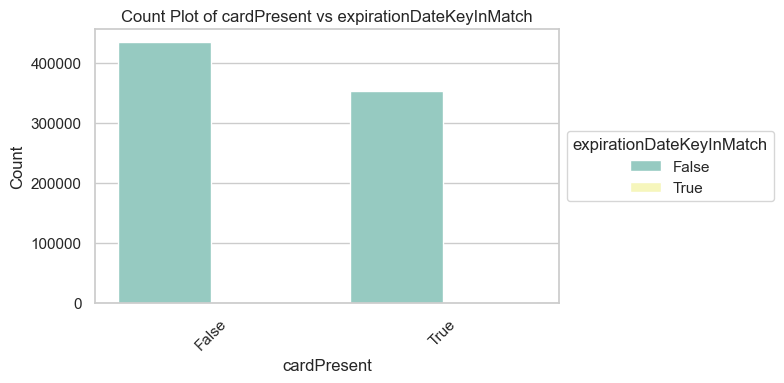

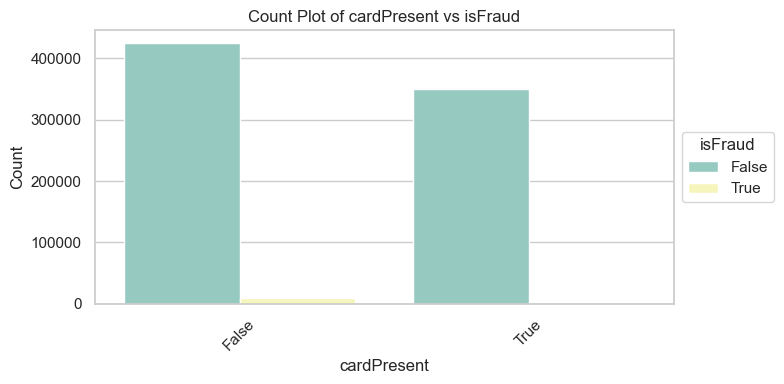

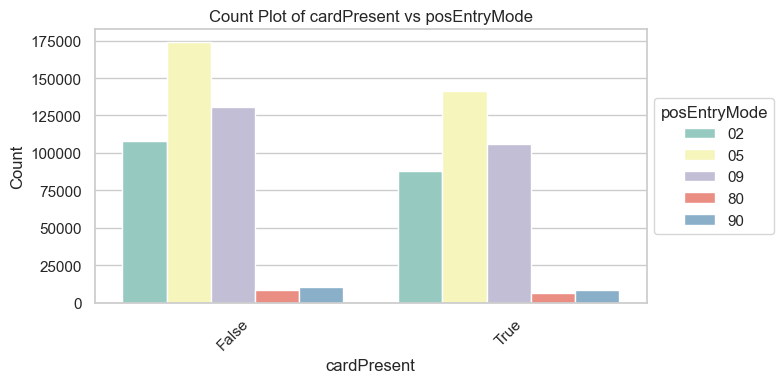

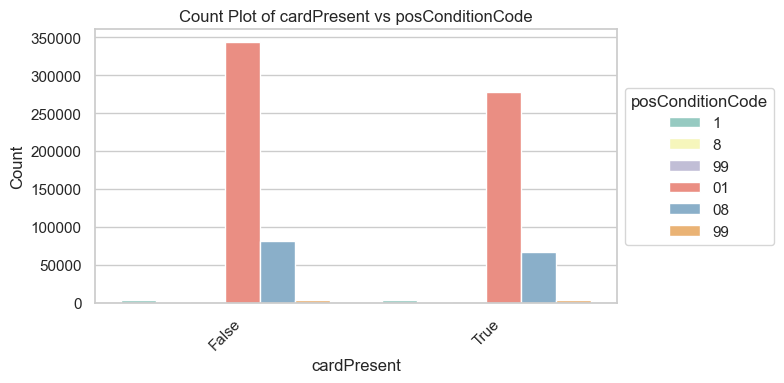

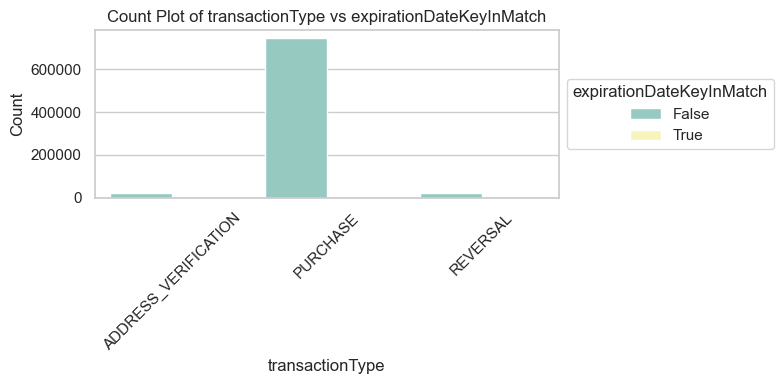

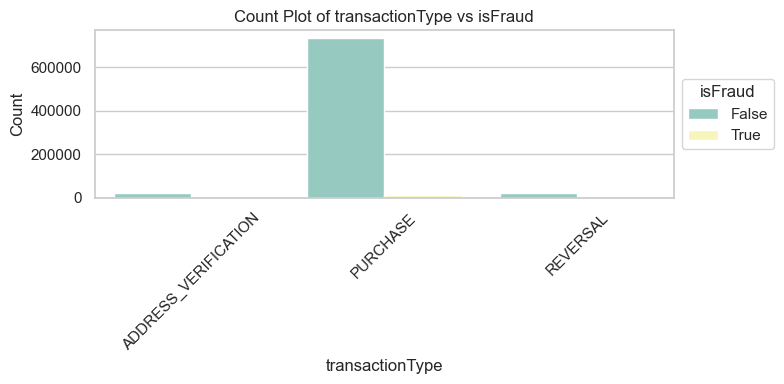

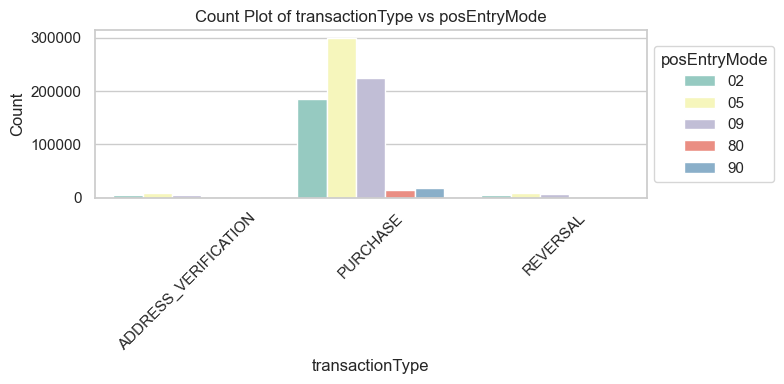

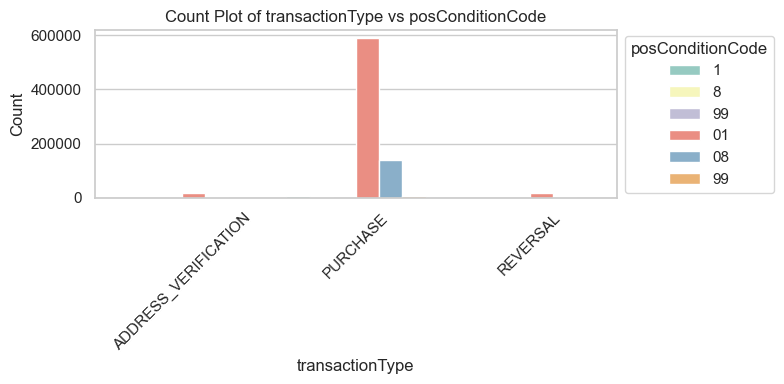

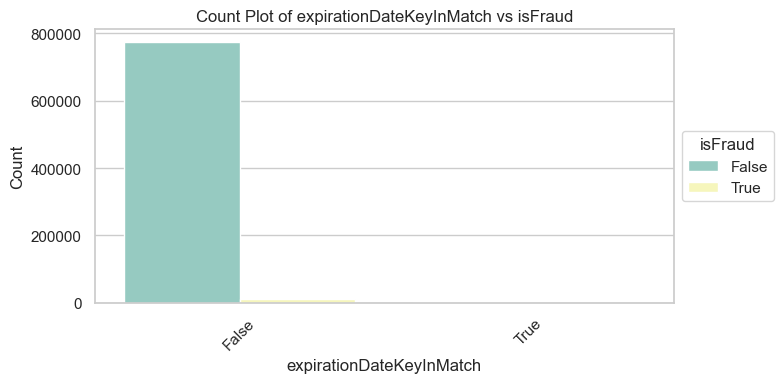

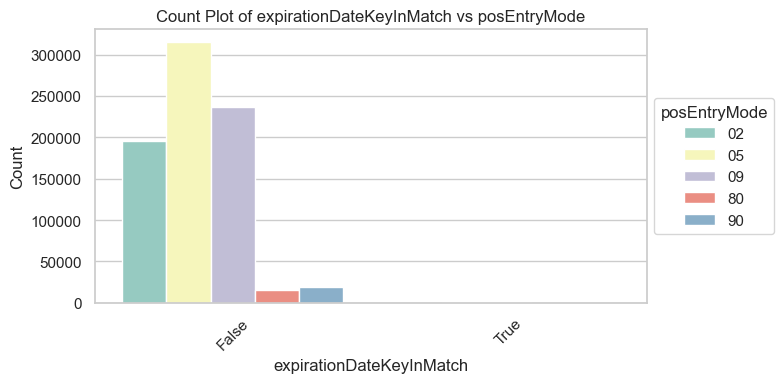

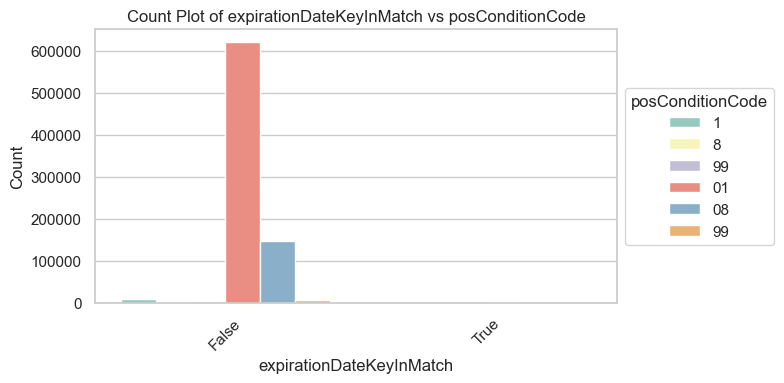

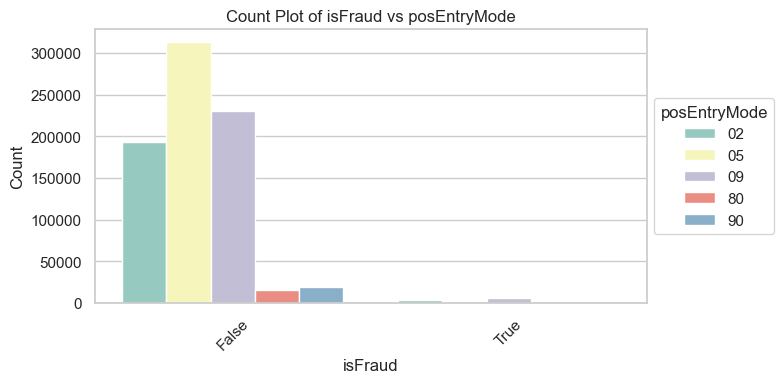

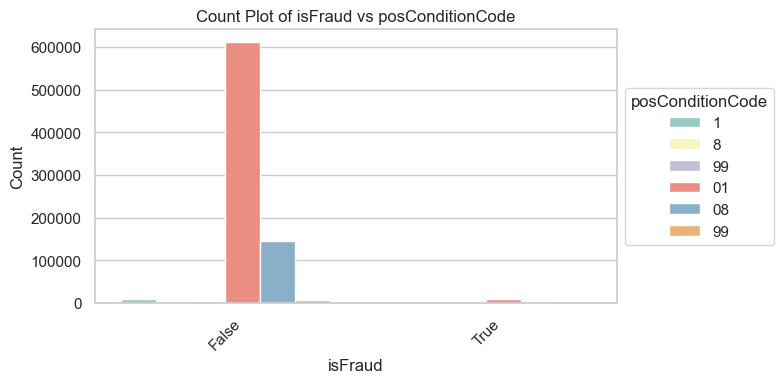

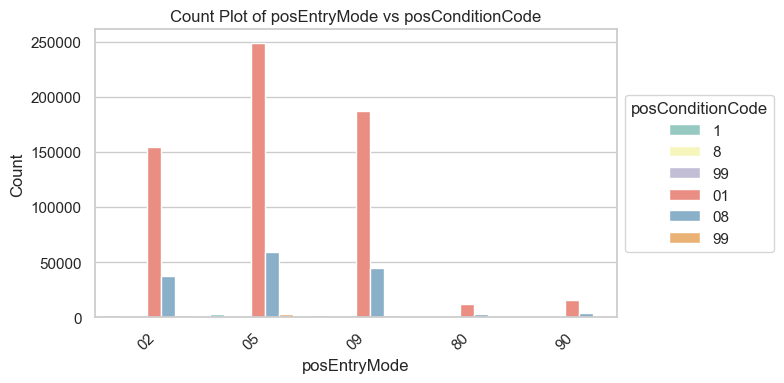

In [78]:
# Create count plots for relationships between two columns
def plot_count_plot(df, x_column, y_column):
    plt.figure(figsize=(8,4))
    df_grouped = df.groupby([x_column, y_column]).size().reset_index(name='count')
    sns.set_palette("Set3")  # Set the desired color palette
    ax = sns.barplot(data=df_grouped, x=x_column, y='count', hue=y_column)
    
    # Move the legend outside to the right and adjust the position
    ax.legend(title=y_column, loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.title(f'Count Plot of {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Get all combinations of two columns
column_combinations = list(combinations(['cardPresent', 'transactionType','expirationDateKeyInMatch', 'isFraud','posEntryMode','posConditionCode'], 2))

# Create count plots for relationships between two columns
for column1, column2 in column_combinations:
    plot_count_plot(df, column1, column2)

From the above charts, several insightful observations about the relationships between categorical columns emerge. Instances of fraud are more frequent in card-not-present transactions, emphasizing their vulnerability. Transactions with expiration date key mismatches correlate with elevated fraud occurrences. Moreover, transaction types align with specific entry modes, implying execution patterns. Specific entry modes also align with certain condition codes, hinting at specialized usage scenarios.  
- These insights collectively deepen comprehension of categorical column interactions, providing valuable insights into transaction patterns, fraud trends, and potential anomalies.

** Note: Data Wrangling, Exploratory Data Analysis, Feature Engineering, and Machine Learning Modeling is performed in file 3_DataWrangling_Modeling.ipynb